# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#cities

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
test = "Raleigh"
#query_url = f"{base_url}appid={weather_api_key}&q="

#city_url = base_url + "appid=" + weather_api_key + "&q=" + city
#OR
city_url = f"{base_url}appid={weather_api_key}&q={test}&units=metric"

weather = requests.get(city_url).json()

print((json.dumps(weather, indent = 4, sort_keys=True)))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 35.7721,
        "lon": -78.6386
    },
    "dt": 1701073180,
    "id": 4487042,
    "main": {
        "feels_like": 3.69,
        "humidity": 95,
        "pressure": 1011,
        "temp": 6.54,
        "temp_max": 7.82,
        "temp_min": 5.11
    },
    "name": "Raleigh",
    "sys": {
        "country": "US",
        "id": 2042838,
        "sunrise": 1701086541,
        "sunset": 1701122537,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 4.12
    }
}


In [54]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = base_url + "appid=" + weather_api_key + "&q=" + city
    city_url = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | salahonda
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | zaozersk
Processing Record 8 of Set 1 | mocimboa
Processing Record 9 of Set 1 | cockburn town
Processing Record 10 of Set 1 | okha
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | rongelap
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | siwa oasis
Processing Record 16 of Set 1 | bonny
Processing Record 17 of Set 1 | grand falls-windsor
Processing Record 18 of Set 1 | umm kaddadah
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | altai
Processing Record 21 of Set 1 | masterton
Processing

Processing Record 39 of Set 4 | chesma
Processing Record 40 of Set 4 | rechka-vydrino
Processing Record 41 of Set 4 | sodankyla
Processing Record 42 of Set 4 | hotan
Processing Record 43 of Set 4 | kalinkavichy
Processing Record 44 of Set 4 | zapadnaya dvina
Processing Record 45 of Set 4 | bikenibeu village
Processing Record 46 of Set 4 | moyale
Processing Record 47 of Set 4 | angaur state
Processing Record 48 of Set 4 | newman
Processing Record 49 of Set 4 | mogocha
Processing Record 0 of Set 5 | vernon
Processing Record 1 of Set 5 | belmonte
Processing Record 2 of Set 5 | emerald
Processing Record 3 of Set 5 | ola
Processing Record 4 of Set 5 | alaghsas
Processing Record 5 of Set 5 | coutances
Processing Record 6 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 5 | calvinia
Processing Record 8 of Set 5 | port isabel
Processing Record 9 of Set 5 | flying fish cove
Processing Record 10 of Set 5 | puerto baquerizo moreno
Processing Record 11 of Set 5 |

City not found. Skipping...
Processing Record 27 of Set 8 | kalix
Processing Record 28 of Set 8 | turpan
Processing Record 29 of Set 8 | santiago papasquiaro
City not found. Skipping...
Processing Record 30 of Set 8 | sillod
Processing Record 31 of Set 8 | aoulef
Processing Record 32 of Set 8 | pont-l'abbe
City not found. Skipping...
Processing Record 33 of Set 8 | alexandria
Processing Record 34 of Set 8 | kidal
Processing Record 35 of Set 8 | muravlenko
Processing Record 36 of Set 8 | horta
Processing Record 37 of Set 8 | zakynthos
Processing Record 38 of Set 8 | ad dabbah
Processing Record 39 of Set 8 | jayapura
Processing Record 40 of Set 8 | badger
Processing Record 41 of Set 8 | mili
Processing Record 42 of Set 8 | notse
Processing Record 43 of Set 8 | porto novo
Processing Record 44 of Set 8 | al hoceima
Processing Record 45 of Set 8 | nar'yan-mar
Processing Record 46 of Set 8 | west end
Processing Record 47 of Set 8 | diplo
Processing Record 48 of Set 8 | saint-leu
Processing R

Processing Record 15 of Set 12 | tutoia
Processing Record 16 of Set 12 | gardnerville ranchos
Processing Record 17 of Set 12 | palmerston
Processing Record 18 of Set 12 | vikulovo
Processing Record 19 of Set 12 | prince george
Processing Record 20 of Set 12 | moussoro
Processing Record 21 of Set 12 | mhamid
Processing Record 22 of Set 12 | mankera
Processing Record 23 of Set 12 | kiunga
Processing Record 24 of Set 12 | mariehamn
Processing Record 25 of Set 12 | ladario
Processing Record 26 of Set 12 | hanover
Processing Record 27 of Set 12 | ujae
Processing Record 28 of Set 12 | baker city
Processing Record 29 of Set 12 | magistral'nyy
Processing Record 30 of Set 12 | rada tilly
Processing Record 31 of Set 12 | sungurlu
Processing Record 32 of Set 12 | mont-dore
Processing Record 33 of Set 12 | bel ombre
Processing Record 34 of Set 12 | cidade velha
Processing Record 35 of Set 12 | santana
Processing Record 36 of Set 12 | severo-yeniseyskiy
Processing Record 37 of Set 12 | buala
Proces

In [55]:
city_data

[{'City': 'wailua homesteads',
  'Lat': 22.0669,
  'Lng': -159.378,
  'Max Temp': 23.44,
  'Humidity': 91,
  'Cloudiness': 75,
  'Wind Speed': 7.2,
  'Country': 'US',
  'Date': 1701073648},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 4.35,
  'Humidity': 78,
  'Cloudiness': 95,
  'Wind Speed': 7.92,
  'Country': 'TF',
  'Date': 1701073648},
 {'City': 'arraial do cabo',
  'Lat': -22.9661,
  'Lng': -42.0278,
  'Max Temp': 19.98,
  'Humidity': 88,
  'Cloudiness': 20,
  'Wind Speed': 2.57,
  'Country': 'BR',
  'Date': 1701073504},
 {'City': 'salahonda',
  'Lat': 2.1019,
  'Lng': -78.7217,
  'Max Temp': 25.97,
  'Humidity': 85,
  'Cloudiness': 73,
  'Wind Speed': 1.16,
  'Country': 'CO',
  'Date': 1701073648},
 {'City': 'aasiaat',
  'Lat': 68.7098,
  'Lng': -52.8699,
  'Max Temp': -5.52,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 4.39,
  'Country': 'GL',
  'Date': 1701073467},
 {'City': 'zaozersk',
  'Lat': 69.4005,
  'Lng': 32.4476,
  'Max Tem

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,23.44,91,75,7.20,US,1701073648
1,port-aux-francais,-49.3500,70.2167,4.35,78,95,7.92,TF,1701073648
2,arraial do cabo,-22.9661,-42.0278,19.98,88,20,2.57,BR,1701073504
3,salahonda,2.1019,-78.7217,25.97,85,73,1.16,CO,1701073648
4,aasiaat,68.7098,-52.8699,-5.52,96,100,4.39,GL,1701073467


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,23.44,91,75,7.20,US,1701073648
1,port-aux-francais,-49.3500,70.2167,4.35,78,95,7.92,TF,1701073648
2,arraial do cabo,-22.9661,-42.0278,19.98,88,20,2.57,BR,1701073504
3,salahonda,2.1019,-78.7217,25.97,85,73,1.16,CO,1701073648
4,aasiaat,68.7098,-52.8699,-5.52,96,100,4.39,GL,1701073467


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

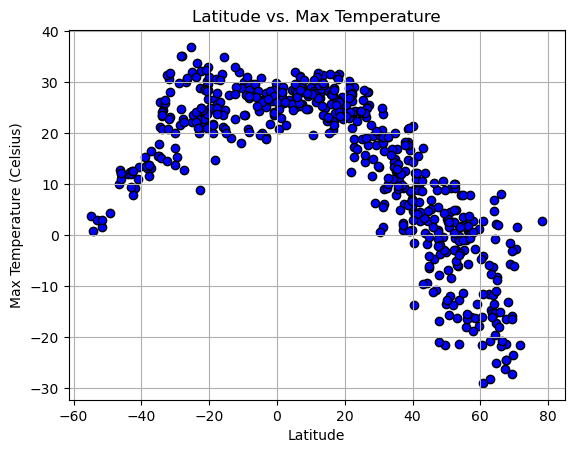

In [62]:
# Build scatter plot for latitude vs. temperature
fig1 = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

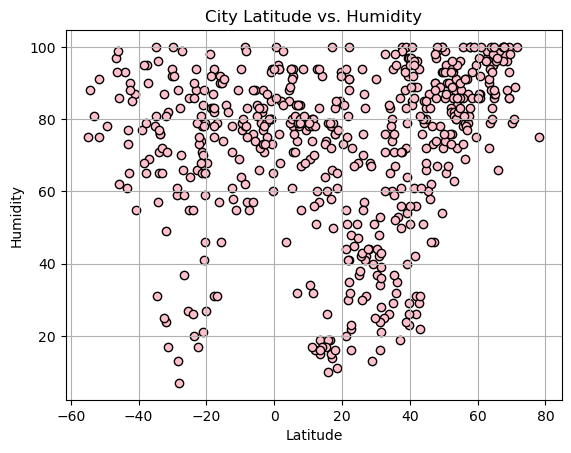

In [64]:
# Build the scatter plots for latitude vs. humidity
fig2 = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", facecolors="pink", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

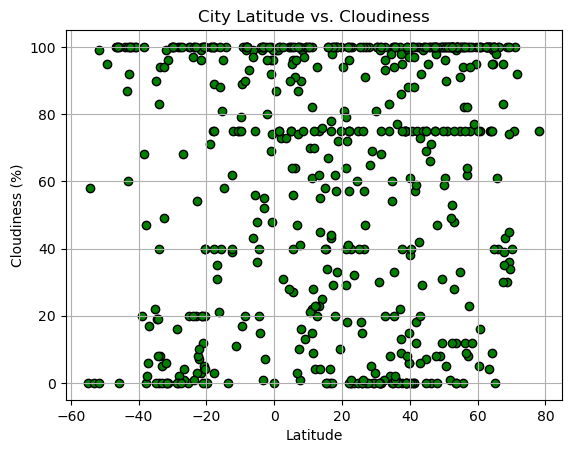

In [65]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", facecolors = "green", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

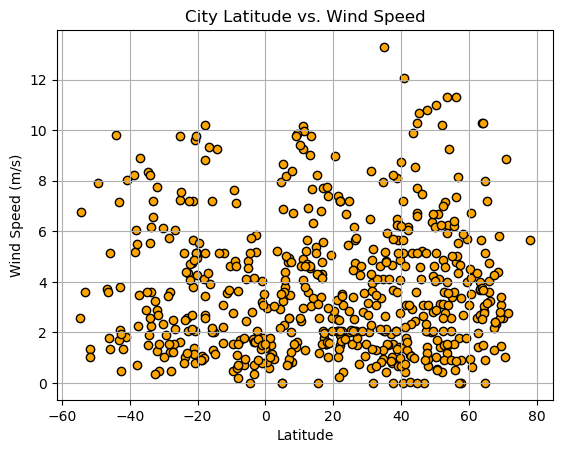

In [66]:
# Build the scatter plots for latitude vs. wind speed
fig4 = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolors = "orange", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


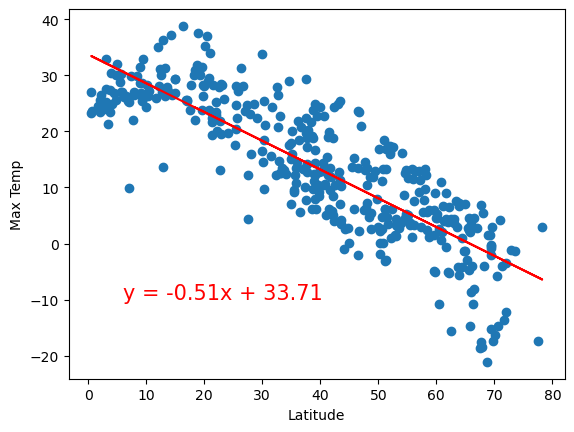

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


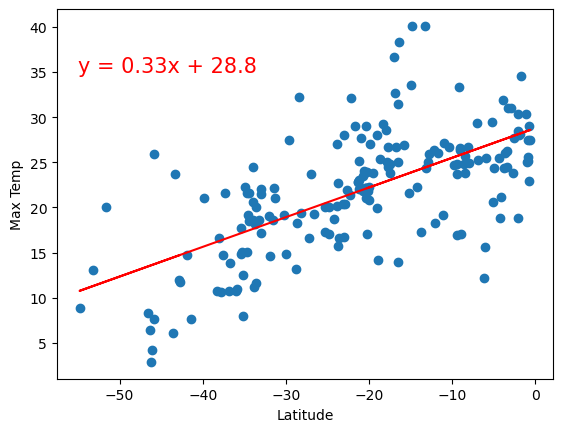

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


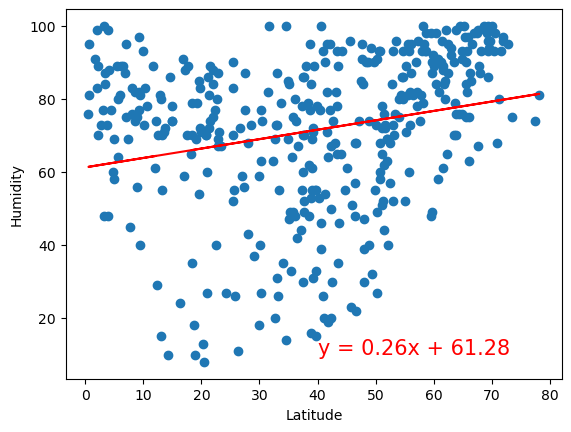

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


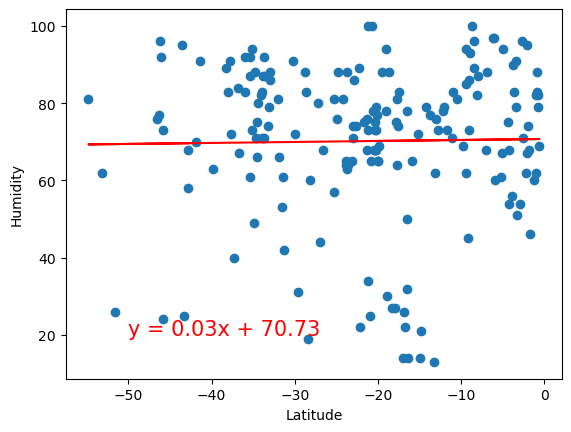

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


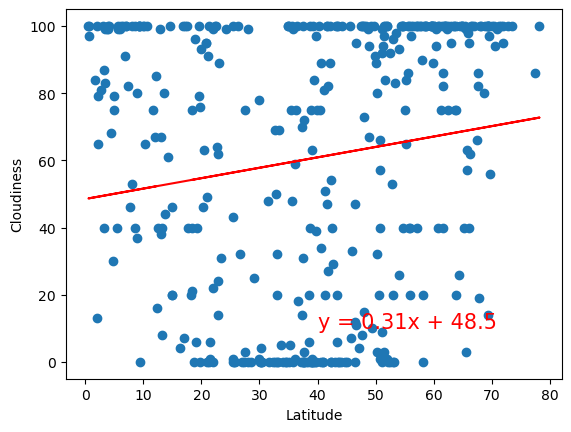

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


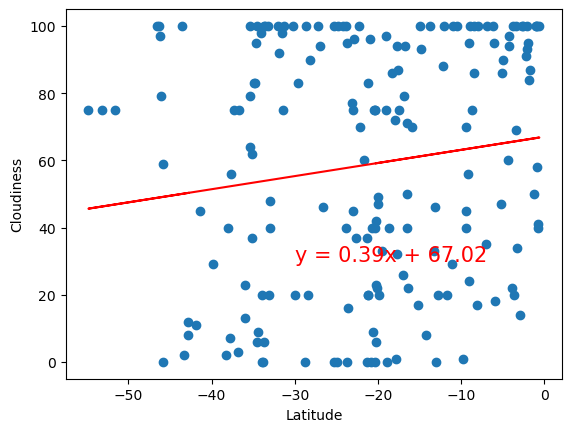

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


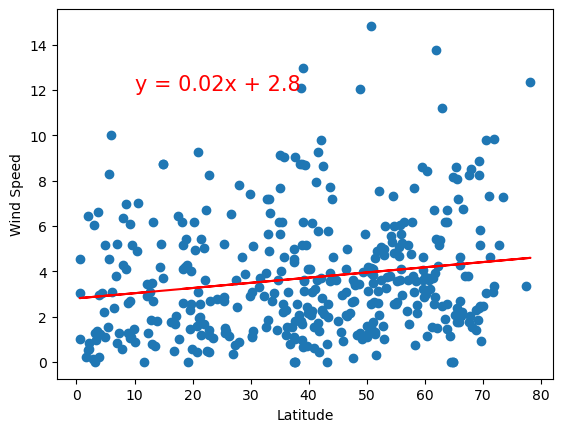

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


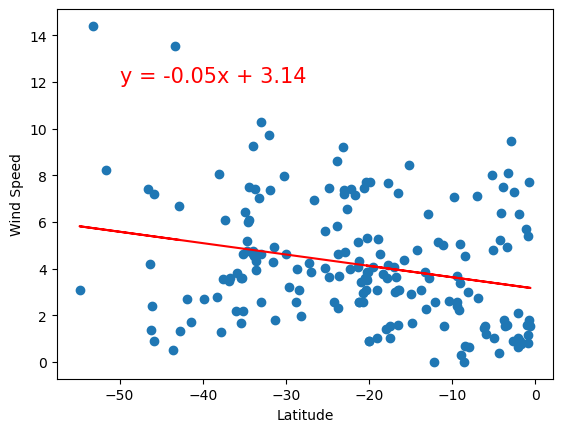

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE